Importing the necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score , KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

Dataset source : https://www.kaggle.com/datasets/rsadiq/salary

**Loading the dataset**

In [5]:
df=pd.read_csv('Salary.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


**Data Exploration**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [7]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [8]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

**Data Visualization**

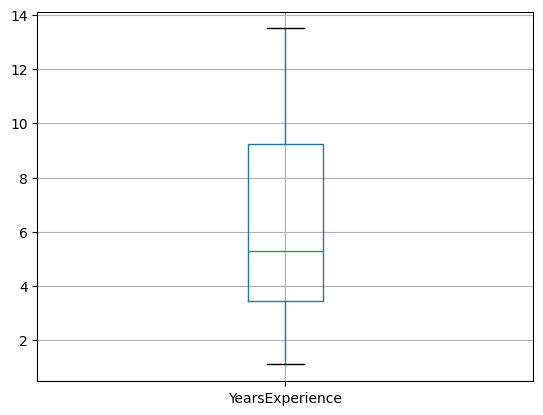

In [10]:
X=pd.DataFrame(df['YearsExperience'])
X.boxplot()
plt.show()

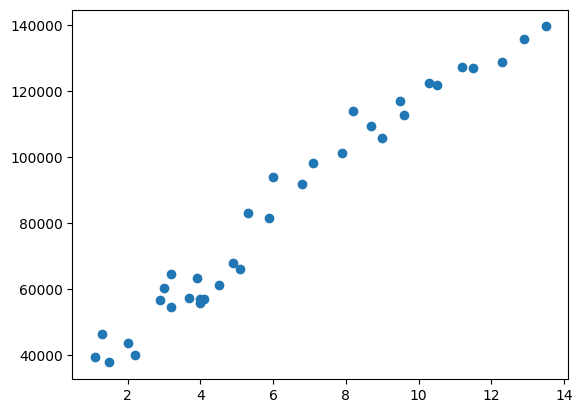

In [11]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.show()

**Cross Validation**

In [37]:
y=df['Salary']
kf=KFold(n_splits=5,shuffle=True,random_state=42)
#On linear regression
reg=LinearRegression()
cv_results_reg=cross_val_score(reg,X,y,cv=kf)
print(cv_results_reg)

[0.89142341 0.9494892  0.96396088 0.9635932  0.97373805]


In [38]:
#On Decision Tree
dt_reg=DecisionTreeRegressor(random_state=42)
cv_results_dt = cross_val_score(dt_reg, X, y, cv=kf)
print(cv_results_dt)

[0.93354741 0.96108097 0.94229746 0.94631026 0.97016981]


**Bagging**

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
linear_models = [('Linear Regression', reg), ('Decision Tree', dt_reg)]

# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in linear_models:
    # Fit clf to the training set
    clf.fit(X_train, y_train)
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    # Evaluate the accuracy of clf on the test set
    rmse =MSE(y_test, y_pred)**(1/2)  # Calculate RMSE
    print('{:s} : {:.3f}'.format(clf_name, rmse))


Linear Regression : 5067.277
Decision Tree : 4692.813


In [15]:
from sklearn.ensemble import VotingRegressor
# Instantiate a VotingClassifier 'vc'
voting_reg = VotingRegressor(estimators=linear_models)

# Fit the VotingRegressor to the training set
voting_reg.fit(X_train, y_train)

# Predict the labels of the test set using the VotingRegressor
y_pred_voting = voting_reg.predict(X_test)

# Evaluate the RMSE of the VotingRegressor on the test set
rmse_voting = MSE(y_test, y_pred_voting, squared=False)
print('Voting Regressor RMSE: {:.3f}'.format(rmse_voting))

Voting Regressor RMSE: 4641.174


**Visualizing model fit**

In [35]:
y_pred_voting = pd.DataFrame(data=y_pred_voting,columns=['YearExperience'])
years_experience=pd.DataFrame({'YearsExperience':X_test['YearsExperience']})
prediction_data=years_experience.assign(Salary=y_pred_voting)
prediction_data

,YearsExperience,Salary
0,3.0,54419.473150
1,11.2,126531.204283
2,2.9,53980.982527
3,4.0,59478.879386
4,8.7,104981.938694
5,3.2,55296.454398
6,10.5,121279.269918


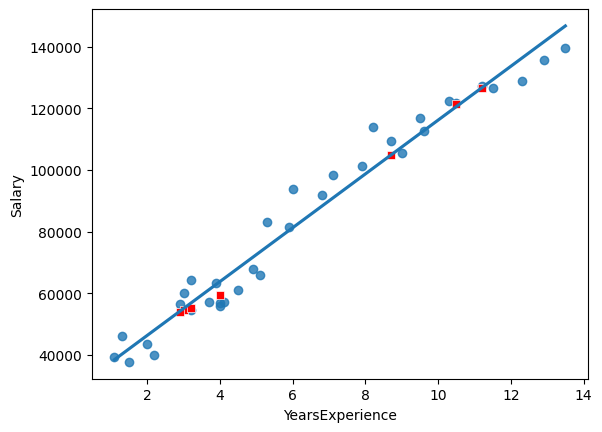

In [36]:
sns.regplot(x="YearsExperience",y="Salary",ci=None,data=df)
sns.scatterplot(x="YearsExperience",y="Salary",data=prediction_data,color="red",marker="s")
plt.show()